<a href="https://colab.research.google.com/github/AlexeyProvorov/Templates/blob/main/RESNET(func).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

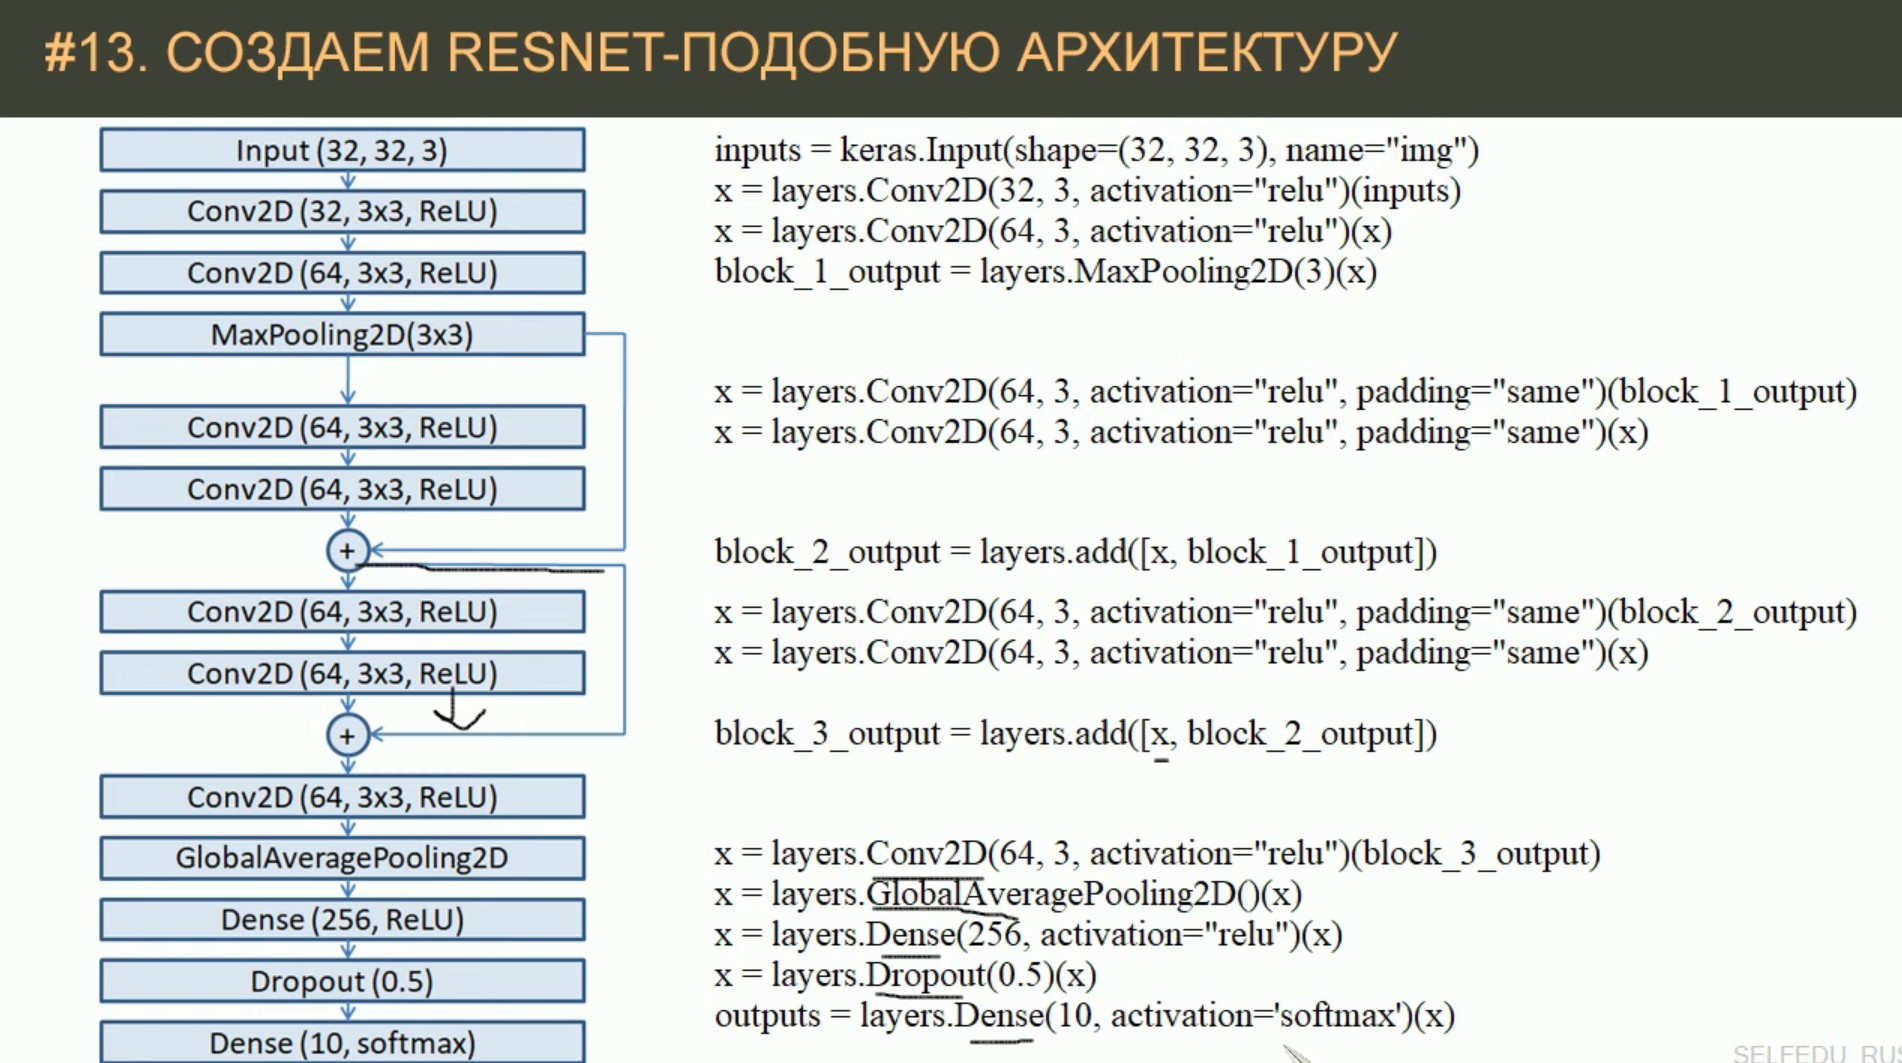

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10, mnist


In [ ]:
tf.random.set_seed(1)


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)




In [ ]:
model = keras.Model(inputs, outputs, name="toy_resnet")

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()


Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)             0         ['conv2d_1[0][0]']            
 D)                                                                                      

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

print( model.evaluate(x_test, y_test) )

Epoch 1/15
625/625 [==============================] - 236s 373ms/step - loss: 1.7838 - accuracy: 0.3094 - val_loss: 1.4351 - val_accuracy: 0.4679
Epoch 2/15
625/625 [==============================] - 237s 380ms/step - loss: 1.3328 - accuracy: 0.5111 - val_loss: 1.1729 - val_accuracy: 0.5638
Epoch 3/15
625/625 [==============================] - 234s 375ms/step - loss: 1.1267 - accuracy: 0.5960 - val_loss: 1.0747 - val_accuracy: 0.6149
Epoch 4/15
625/625 [==============================] - 226s 361ms/step - loss: 0.9769 - accuracy: 0.6534 - val_loss: 1.0192 - val_accuracy: 0.6531
Epoch 5/15
625/625 [==============================] - 234s 375ms/step - loss: 0.8673 - accuracy: 0.6922 - val_loss: 0.8521 - val_accuracy: 0.6984
Epoch 6/15
625/625 [==============================] - 234s 374ms/step - loss: 0.7906 - accuracy: 0.7236 - val_loss: 0.8018 - val_accuracy: 0.7141
Epoch 7/15
625/625 [==============================] - 229s 367ms/step - loss: 0.7222 - accuracy: 0.7490 - val_loss: 0.7180 -